In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mpltex

%matplotlib notebook

In [2]:
def tf_by_td(tm,tg,U0=3.):
    return np.exp(U0)*(1/(U0*(1 + 10*U0*tg)) +tm/U0 + 2*np.sqrt(tm/U0)+ np.exp(1)*tg*tg)

In [55]:
tm = np.logspace(-4.0,2,num=1600,endpoint=True) 
tg = np.logspace(-4.0,2,num=1600,endpoint=True) 

X, Y = np.meshgrid(tg,tm,indexing='ij')
Z = np.zeros(np.shape(X))
#MFPT_markovian = tf_by_td(tm,0.)


for i,e in enumerate(tg):
    for j,f in enumerate(tm):
        #print(f)
        if  (tf_by_td(f,e) - tf_by_td(f,0.))/tf_by_td(f,0.) < -0.05:
            Z[i,j] = 1 
        elif  abs (tf_by_td(f,e) - tf_by_td(f,0.))/tf_by_td(f,0.) < 0.05:
            Z[i,j] = 3     
        elif tf_by_td(f,e)>tf_by_td(f,0.):
            Z[i,j] = 2 
       

In [56]:
Z

array([[3., 3., 3., ..., 3., 3., 3.],
       [3., 3., 3., ..., 3., 3., 3.],
       [3., 3., 3., ..., 3., 3., 3.],
       ...,
       [2., 2., 2., ..., 2., 2., 2.],
       [2., 2., 2., ..., 2., 2., 2.],
       [2., 2., 2., ..., 2., 2., 2.]])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: The following kwargs were not used by contour: 'colorextend'
  


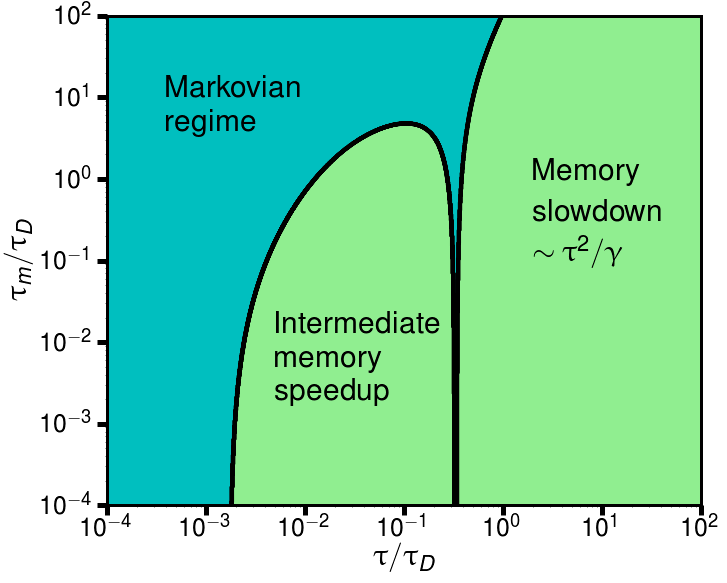

In [57]:
@mpltex.acs_decorator
def my_plot2():
    fig, ax = plt.subplots(1,1,figsize=(10,8))


    ax.contourf(X, Y, Z, colors=['lightgreen', 'c', 'violet'],colorextend='both')
    ax.contour(X, Y, Z, colors='k', linewidths=(4,))
    ax.set_yscale('log')
    ax.set_xscale('log')
    #ax.legend(fancybox=True, fontsize=20, loc="lower left", borderpad=0, handlelength=1, labelspacing=0.1)
    #ax.tick_params(axis='both')
    #plt.xlim(-25,40)
    #plt.ylim(-50,35)
    plt.xlabel('$$\\tau/\\tau_D$$', fontsize=30)
    plt.ylabel('$$\\tau_m/\\tau_D$$', fontsize=30)
    #plt.title('$\\tau_m/\\tau_D=0.01, \quad \gamma_2/\gamma_1=5$', fontsize=30)
    plt.text(0.0004, 10,'Markovian', fontsize=30)
    plt.text(0.0004, 4,'regime', fontsize=30)
    
    plt.text(0.005, 0.013,'Intermediate', fontsize=30)
    plt.text(0.005, 0.005,'memory', fontsize=30)
    plt.text(0.005, 0.002,'speedup', fontsize=30)
    
    plt.text(2, 1,'Memory', fontsize=30)
    plt.text(2, 0.3,'slowdown', fontsize=30)
    plt.text(2, 0.1,'$\\sim \\tau^2/\\gamma$', fontsize=30)
    
    ax.tick_params(axis='both',labelsize=25,length = 10,width = 5)
    
    for spine in ['top', 'bottom', 'left', 'right']:
        ax.spines[spine].set_linewidth(3)

    plt.savefig('Scaling1D.pdf', bbox_inches='tight')
    plt.show(block=False)
    plt.close(fig)
    
my_plot2()   